<a href="https://colab.research.google.com/github/Sai0210/homework2/blob/main/Question_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

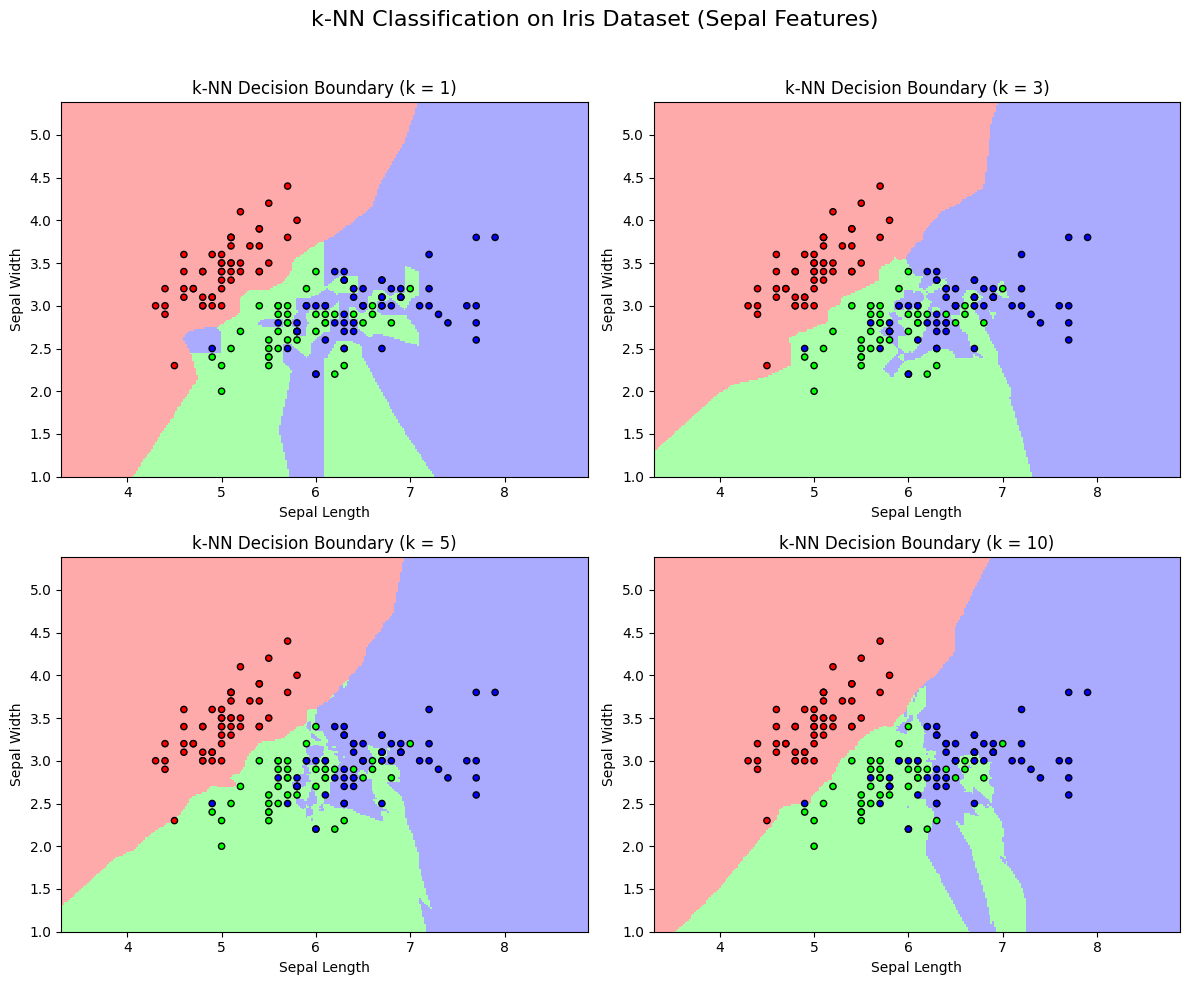

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# 1. Load the Iris dataset
iris = datasets.load_iris()

# We only take the first two features for visualization purposes
# X represents Sepal Length and Sepal Width
X = iris.data[:, :2]
y = iris.target

# List of k values to test
k_values = [1, 3, 5, 10]

# Create color maps for plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Set up the plot
plt.figure(figsize=(12, 10))

# 2. Iterate through each k value to train a model and plot its boundary
for i, k in enumerate(k_values):
    # Create an instance of the KNeighborsClassifier
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Define the mesh grid for plotting the decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class for each point in the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    # Create a subplot for each k
    plt.subplot(2, 2, i + 1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points on top
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"k-NN Decision Boundary (k = {k})")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

# Display the final plot
plt.suptitle("k-NN Classification on Iris Dataset (Sepal Features)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()